train data statistics
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   

testing data statistics
       PassengerId      Pclass   

<Figure size 800x600 with 0 Axes>

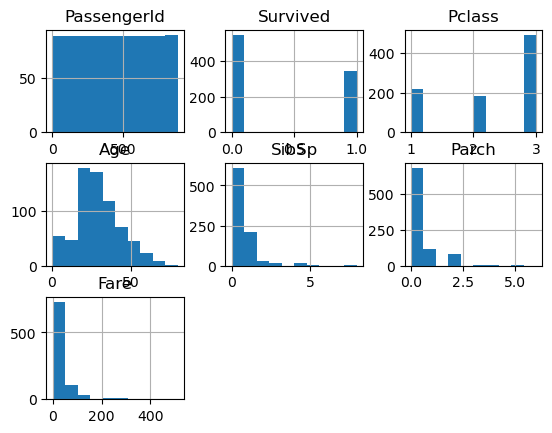

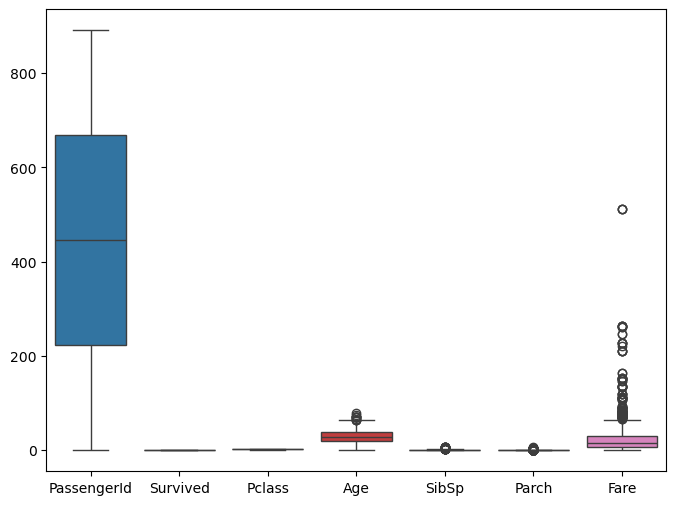

Null values
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


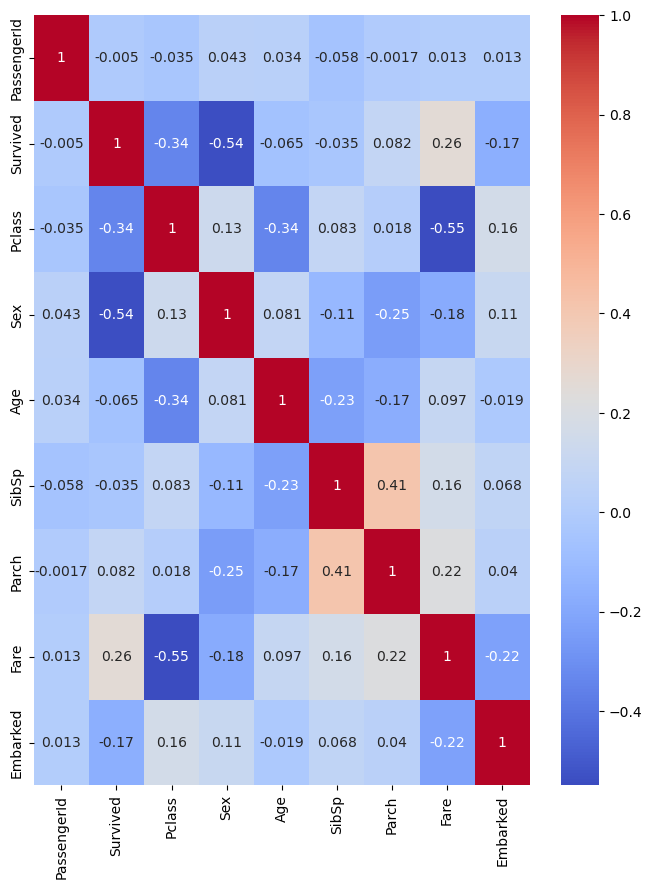


model evolution
accuracy score 0.8013468013468014 

precision score 0.7619047619047619 

recall score 0.7017543859649122 

F1 score 0.730593607305936 

ROC,AUC score 0.7825711820534944 



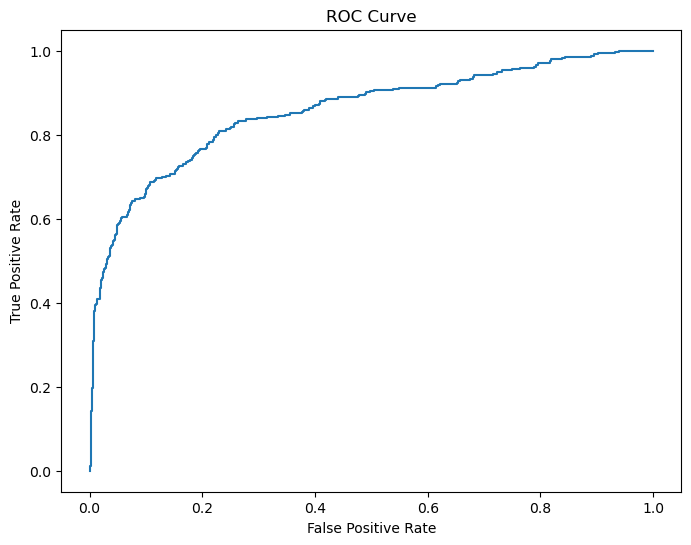

       Feature  Coefficient
0  PassengerId     0.000082
1       Pclass    -1.050242
2          Sex    -2.633815
3          Age    -0.038085
4        SibSp    -0.314682
5        Parch    -0.087951
6         Fare     0.002168
7     Embarked    -0.212790


In [6]:
from sys import float_repr_style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import streamlit as st
#loading the data
test_df=pd.read_csv('Titanic_test.csv')
train_df=pd.read_csv('Titanic_train.csv')
train_df.head()
#EDA
#summary
print("train data statistics")
print(train_df.describe(),"\n")
print("testing data statistics")
print(test_df.describe(),"\n")
#histogram
plt.figure(figsize=(8,6))
train_df.hist()
plt.show()
#boxplot
plt.figure(figsize=(8,6))
sns.boxplot(train_df)
plt.show()
#data preprocessing
#dropping unwanted data
train_df=train_df.drop(['Ticket','Name','Cabin'],axis=1)
test_df=test_df.drop(['Name','Ticket','Cabin'],axis=1)
#finding null values
print("Null values")
print(train_df.isnull().sum())
print(test_df.isnull().sum())
#filling missing values
train_df['Age']=train_df['Age'].fillna(train_df['Age'].median())
test_df['Age']=test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].median())
train_df['Embarked']=train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
#coverting categoral data to numerical
# Use separate LabelEncoder instances for 'Sex' and 'Embarked'
le_sex = LabelEncoder()
train_df['Sex'] = le_sex.fit_transform(train_df['Sex'])
test_df['Sex'] = le_sex.transform(test_df['Sex'])

le_embarked = LabelEncoder()
train_df['Embarked'] = le_embarked.fit_transform(train_df['Embarked'])
test_df['Embarked'] = le_embarked.transform(test_df['Embarked'])

#heatmap
plt.figure(figsize=(8,10))
sns.heatmap(train_df.corr(),annot=True,cmap='coolwarm')
plt.show()
#
x=train_df.drop("Survived",axis=1)
y=train_df["Survived"]
#modelbuilding
model=LogisticRegression(max_iter=500)
model.fit(x,y)
#modelevolution
y_pred=model.predict(x)
print("\nmodel evolution")
print("accuracy score",accuracy_score(y,y_pred),"\n")
print("precision score",precision_score(y,y_pred),"\n")
print("recall score",recall_score(y,y_pred),"\n")
print("F1 score",f1_score(y,y_pred),"\n")
print("ROC,AUC score",roc_auc_score(y,y_pred),"\n")
#ROC Curve
yprob=model.predict_proba(x)[:,1]
fpr,tpr,treshold=roc_curve(y,yprob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
#Interpet Model Coefficient
coef_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
})

print(coef_df)
#final pediction for test data
test_predictions = model.predict(x)
#streamlit
st.title("Titanic Survival Prediction")
st.write("Enter the passenger details to predict survival:")
#inputs
Pclass=st.selectbox("Passenger Class(1=Upper,2=Middle,3=Lower)",[1,2,3])
Sex=st.selectbox("Sex(0=Female,1=Male)",[0,1])
Age=st.number_input("Age",min_value=0,max_value=100)
SibSp=st.number_input("Number of siblings/spouses aboard",min_value=0,max_value=10)
parch=st.number_input("Number of parents/children aboard",min_value=0,max_value=10)
fare=st.number_input("Fare",min_value=0.0,max_value=1000.0)
embarked=st.selectbox("Embarked Port", ["S", "C", "Q"])
# encode input values
input_data = pd.DataFrame({
    "Pclass": [Pclass],
    "Sex": [Sex], # Sex is already numerical (0 or 1), no need to transform again
    "Age": [Age],
    "SibSp": [SibSp],
    "Parch": [parch],
    "Fare": [fare],
    "Embarked": [le_embarked.transform([embarked])[0]] # Use the dedicated embarked encoder
})
# PREDICTION
# -----------------------------
if st.button("Predict Survival"):
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.success(f"✅ The passenger **SURVIVED** (Probability: {probability:.2f})")
    else:
        st.error(f"❌ The passenger **DID NOT SURVIVE** (Probability: {probability:.2f})")